In [4]:
import spacy

from gcp_fx import (
    PROJECT_ID, 
    CREDENTIALS, 
    print_meta_data,
    query_bq,
    # delete_bq_table,
)

import pandas as pd

In [2]:
NER = spacy.load("en_core_web_sm")
def get_entity(s):
    ''' for a string return an entity type

        PERSON: Refers to individuals, including fictional and real people.
        NORP: Represents nationalities, religious or political groups.
        FAC: Denotes buildings, airports, highways, bridges, etc.
        ORG: Refers to organizations such as companies, institutions, agencies, etc.
        GPE: Represents countries, cities, states, and other geopolitical entities.
        LOC: Denotes non-GPE locations such as mountains, bodies of water, etc.
        PRODUCT: Represents objects, vehicles, food items, etc.
        EVENT: Denotes named events like hurricanes, battles, wars, etc.
        WORK_OF_ART: Represents books, paintings, songs, etc.
        LAW: Denotes named laws and regulations.
        LANGUAGE: Represents named languages.
        DATE: Represents dates in various formats.
        TIME: Denotes times in various formats.
        PERCENT: Represents percentage values.
        MONEY: Denotes monetary values.
        QUANTITY: Represents measurements, quantities, or counts.
        ORDINAL: Denotes first, second, third, etc.
        CARDINAL: Represents numerical values, counting numbers.
    '''
    if NER(s).ents:
        return NER(s).ents[0].label_
    else:
        return ''

In [5]:
sql = '''select min(refresh_date),max(refresh_date) FROM `bigquery-public-data.google_trends.top_terms`'''
query_bq(sql)

shape = (1, 2)
columns =  ['f0_', 'f1_']


,f0_,f1_
0,2023-05-26,2023-06-29


In [6]:
sql = '''-- query top search term, table only has most recent month
SELECT
   refresh_date AS Day,
   term AS Top_Term
FROM `bigquery-public-data.google_trends.top_terms`
WHERE
   rank = 1
GROUP BY Day, Top_Term, rank
ORDER BY Day DESC
'''
# query top search terms, save to df
df = (
    query_bq(sql)
    .assign(ent=lambda x: [get_entity(s) for s in x.Top_Term])
)

shape = (33, 2)
columns =  ['Day', 'Top_Term']


PERSON    12
ORG        9
GPE        4
           4
DATE       3
EVENT      1
Name: ent, dtype: int64


<Axes: >

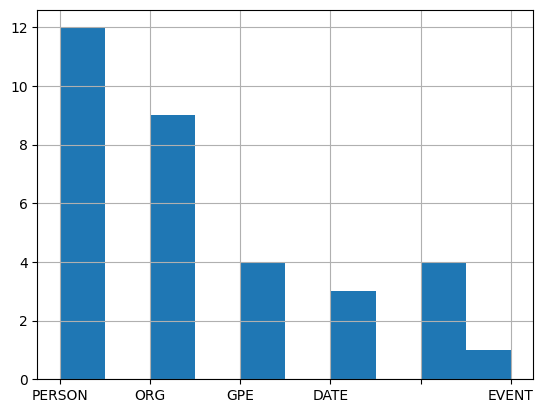

In [7]:
print(df.ent.value_counts())
df.ent.hist()

#### conclusion: 
we usually google people, orgs, then dates & events